In [1]:
import pandas as pd
import os
import matplotlib as mpl
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print(mpl.__version__)
# seaborn 스타일 사용
plt.style.use('seaborn-notebook')

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


3.4.3


In [2]:
data = pd.read_csv('Dataset/DataSet_01.csv')

In [3]:
data

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [7]:
data.isna().sum().sum()

26

In [10]:
data.isna().any(axis=1).sum()

26

<AxesSubplot:>

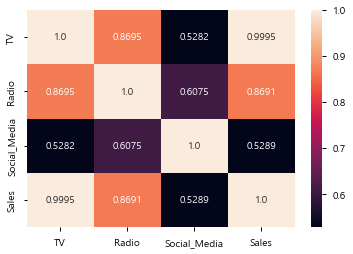

In [25]:
sns.heatmap(data.corr(), annot=True, fmt='.4')

In [36]:
round(data.corr().drop('Sales')['Sales'].abs().max(), 4)

# max 
# idxmax => 최대값이 있는 인덱스명
# argmax => 최대값이 있는 위치번호
# nlargest(1) => 최대값과 인덱스명 리턴

0.9995

In [37]:
from sklearn.linear_model import LinearRegression

from statsmodels.formula.api import ols # 절편 포함

from statsmodels.api import OLS, add_constant # 절편 추가되도록 설계

In [40]:
var_list=['TV', 'Radio', 'Social_Media']

In [46]:
# LinearRegression => 결측치 제거, 독립변수는 2차원 
lm = LinearRegression(fit_intercept=True)

In [47]:
data_dropna = data.dropna()

In [49]:
lm.fit(data_dropna[var_list], data_dropna['Sales'])

LinearRegression()

In [50]:
# 메소드 확인
dir(lm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [53]:
lm.intercept_

-0.13396305194211777

In [54]:
lm.coef_

array([ 3.56256963, -0.00397039,  0.00496402])

In [57]:
pd.Series(lm.coef_, index = var_list).sort_values(ascending=False)

TV              3.562570
Social_Media    0.004964
Radio          -0.003970
dtype: float64

In [ ]:
# ols
# 식 : '종속 ~ x1 + x2 + x3'
# 종속 ~ x1 + x2 + x3 -1' => 절편 제거
# 종속 ~ x1 + C(x2) + x3' => x2 범주화(자동으로 더미화 해줌)

# 

In [61]:
lm = ols('Sales ~ TV+Radio+Social_Media', data_dropna).fit()

In [63]:
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k

In [64]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:22:55   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
lm.outlier_test()

,student_resid,unadj_p,bonf(p)
0,-0.719867,0.471644,1.0
1,0.177422,0.859185,1.0
2,1.456438,0.145341,1.0
3,0.940040,0.347247,1.0
4,1.124662,0.260792,1.0
...,...,...,...
4567,0.748484,0.454207,1.0
4568,-1.240494,0.214857,1.0
4569,2.397313,0.016556,1.0
4570,0.292277,0.770088,1.0


In [66]:
data = pd.read_csv('Dataset/DataSet_02.csv')

In [67]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [75]:
data[(data.Sex == 'F') & (data.BP == 'HIGH') & (data.Cholesterol == 'NORMAL')]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
11,34,F,HIGH,NORMAL,19.199,DrugY
15,16,F,HIGH,NORMAL,15.516,DrugY
19,32,F,HIGH,NORMAL,25.974,DrugY
25,28,F,HIGH,NORMAL,18.809,DrugY
33,65,F,HIGH,NORMAL,31.876,DrugY
41,58,F,HIGH,NORMAL,14.239,drugB
53,24,F,HIGH,NORMAL,18.457,DrugY
54,68,F,HIGH,NORMAL,10.189,drugB
69,18,F,HIGH,NORMAL,24.276,DrugY
77,26,F,HIGH,NORMAL,19.161,DrugY


In [76]:
q2 = data.copy()

In [77]:
q2['Age_gr'] = np.where(q2.Age < 20, 10,
                np.where(q2.Age < 30, 20,
                np.where(q2.Age < 40, 30,
                np.where(q2.Age < 50, 40,
                np.where(q2.Age < 60, 50, 60)))))

In [78]:
q2['Na_K_gr'] = np.where(q2.Na_to_K <= 10, 'Lv1' , 
                np.where(q2.Na_to_K <= 20, 'Lv2' ,
                np.where(q2.Na_to_K <= 30, 'Lv3' , 'Lv4')))

In [80]:
temp = pd.crosstab(index = q2['Sex'], columns=q2['Drug'])

In [81]:
temp

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


In [82]:
from scipy.stats import chi2_contingency

In [83]:
chi2_contingency(temp)

(2.119248418109203,
 0.7138369773987128,
 4,
 array([[43.68, 11.04,  7.68,  7.68, 25.92],
        [47.32, 11.96,  8.32,  8.32, 28.08]]))

In [84]:
var_list = ['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']

In [86]:
q2_out = []
for i in var_list:
    temp = pd.crosstab(index = q2[i], columns=q2['Drug'])
    chi_out = chi2_contingency(temp)
    pvalue = chi_out[1]
    q2_out.append([i,pvalue])

In [87]:
q2_out

[['Sex', 0.7138369773987128],
 ['BP', 5.0417334144665895e-27],
 ['Cholesterol', 0.0005962588389856497],
 ['Age_gr', 0.0007010113024729462],
 ['Na_K_gr', 1.1254641594413981e-14]]

In [88]:
q2_out = pd.DataFrame(q2_out, columns = ['var', 'pvalue'])

In [89]:
q2_out

,var,pvalue
0,Sex,7.138370e-01
1,BP,5.041733e-27
2,Cholesterol,5.962588e-04
3,Age_gr,7.010113e-04
4,Na_K_gr,1.125464e-14


In [94]:
q2_out[q2_out.pvalue < 0.05]

,var,pvalue
1,BP,5.041733e-27
2,Cholesterol,5.962588e-04
3,Age_gr,7.010113e-04
4,Na_K_gr,1.125464e-14


In [96]:
q2_out[q2_out.pvalue < 0.05].max()

var        Na_K_gr
pvalue    0.000701
dtype: object

In [98]:
q3 = data.copy()

In [99]:
q3['Sex_cd'] = np.where(q3.Sex == 'M', 0, 1)

In [100]:
q3['BP_cd'] = np.where(q3.BP == 'LOW', 0 ,
              np.where(q3.BP == 'NORMAL', 1, 2))

In [101]:
q3['Ch_cd'] = np.where(q3.Cholesterol == 'NORMAL', 0, 1)

In [103]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [107]:
var_list = ['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']

In [108]:
dt = DecisionTreeClassifier().fit(q3[var_list], q3['Drug'])

[Text(0.625, 0.875, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(0.5, 0.625, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugB'),
 Text(0.25, 0.375, 'BP_cd <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 0, 16, 54]\nclass = drugB'),
 Text(0.125, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.375, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]\nclass = drugC'),
 Text(0.625, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 91\nvalue = [91, 0, 0, 0, 0]\nclass = DrugY')]

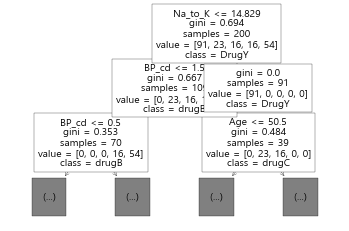

In [112]:
plot_tree(dt, max_depth=2, feature_names=var_list, class_names=list(q3.Drug.unique()), precision = 3, fontsize=10)

In [115]:
print(export_text(dt, decimals=3, feature_names=var_list))

|--- Na_to_K <= 14.829
|   |--- BP_cd <= 1.500
|   |   |--- BP_cd <= 0.500
|   |   |   |--- Ch_cd <= 0.500
|   |   |   |   |--- class: drugX
|   |   |   |--- Ch_cd >  0.500
|   |   |   |   |--- class: drugC
|   |   |--- BP_cd >  0.500
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.500
|   |   |--- Age <= 50.500
|   |   |   |--- class: drugA
|   |   |--- Age >  50.500
|   |   |   |--- class: drugB
|--- Na_to_K >  14.829
|   |--- class: DrugY



In [116]:
dt.feature_importances_

array([0.13595415, 0.47628234, 0.        , 0.26571772, 0.12204579])

In [117]:
data = pd.read_csv('Dataset/DataSet_03.csv')

In [118]:
# 'long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [120]:
q1 = data.copy()

In [122]:
q1['forehead_ratio'] = q1['forehead_width_cm'] / q1['forehead_height_cm']

In [123]:
xbar = q1['forehead_ratio'].mean()

In [124]:
std = q1['forehead_ratio'].std()

In [125]:
LB = xbar - (3*std)
UB = xbar + (3*std)

In [127]:
((q1['forehead_ratio'] < LB) | (q1['forehead_ratio'] > UB)).sum()

3

In [ ]:
# 2표본 평균 차이 검정 : ttest
# ttest_ind : 독립 이표본 
# ttest_rel : 대응 이표본

In [128]:
from scipy.stats import ttest_ind, bartlett, levene

In [130]:
# 이분산 검정
bartlett_out = bartlett(q1[q1.gender == 'Male']['forehead_ratio'],
        q1[q1.gender == 'Female']['forehead_ratio'])

In [131]:
bartlett_out.pvalue
# 등분산이 아님

2.4617792693952707e-48

In [132]:
# 평균 차이 검정
ttest_out = ttest_ind(q1[q1.gender == 'Male']['forehead_ratio'],
        q1[q1.gender == 'Female']['forehead_ratio'], equal_var = False)

In [133]:
round(abs(ttest_out.statistic),3)

2.999

In [134]:
ttest_out.pvalue < 0.01

True

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
train, test = train_test_split(data, test_size = 0.3, random_state=123)

In [138]:
var_list = data.columns.drop('gender')

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
logit = LogisticRegression().fit(train[var_list], train['gender'])

In [142]:
pred_class = logit.predict(test[var_list])

In [144]:
pred_pr = logit.predict_proba(test[var_list])

In [145]:
pred_class2 = np.where(pred_pr[:1] >= 0.7, 'Male', "Female")

In [146]:
from sklearn.metrics import precision_score, classification_report

In [147]:
round(precision_score(test['gender'], pred_class, pos_label='Male'),2)

0.96